In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

<h1>WebScrapping General Election</h1>
<h2> Arunachal Pradesh, Andhra Pradesh, Odisha, Sikkim </h2>

In [8]:
# URL of the website
url = "https://results.eci.gov.in/"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Find all links containing "https://results.eci.gov.in"
links = soup.find_all('a', href=True)
eci_links = [link['href'] for link in links if "https://results.eci.gov.in" in link['href']]
eci_links = set(eci_links)

# Create a dictionary with webpage names as keys
eci_links_dict = {}
for link in eci_links:
    # Extract the webpage name from the URL
    key = link.split('/')[-2] if link.endswith('/') else link.split('/')[-2]
    # Ensure unique keys by appending an index if necessary
    if key in eci_links_dict:
        i = 1
        while f"{key}_{i}" in eci_links_dict:
            i += 1
        key = f"{key}_{i}"
    eci_links_dict[key] = link

# Print the dictionary
for key, value in eci_links_dict.items():
    print(f"{key}: {value}")

PcResultGenJune2024: https://results.eci.gov.in/PcResultGenJune2024/index.htm
AcResultGen2ndJune2024: https://results.eci.gov.in/AcResultGen2ndJune2024/index.htm
AcResultGenJune2024: https://results.eci.gov.in/AcResultGenJune2024/index.htm
AcResultByeJune2024: https://results.eci.gov.in/AcResultByeJune2024/


In [9]:
# Function to fetch state links for a given base_url
def fetch_state_links(base_url, state_codes):
    url = base_url
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Find all relevant links
    links = soup.find_all('a', href=True)
    partial_links = [link['href'] for link in links if any(state_code in link['href'] for state_code in state_codes)]
    
    # Complete the links by adding the base URL
    state_links = {}
    for link in partial_links:
        for state_code in state_codes:
            if state_code in link:
                state_name = get_state_name(state_code)
                state_links[state_name] = base_url + link
    
    return state_links

# Function to get state name from state code
def get_state_name(state_code):
    if state_code == "S01":
        return "Andhra Pradesh"
    elif state_code == "S02":
        return "Arunachal Pradesh"
    elif state_code == "S18":
        return "Odisha"
    elif state_code == "S21":
        return "Sikkim"
    else:
        return "Unknown"

# Base URLs
base_url_AcResultGen2ndJune2024 = "https://results.eci.gov.in/AcResultGen2ndJune2024/"
base_url_AcResultGenJune2024 = "https://results.eci.gov.in/AcResultGenJune2024/"

# State codes for each base URL
state_codes_AcResultGen2ndJune2024 = ["S02", "S21"]
state_codes_AcResultGenJune2024 = ["S01", "S18"]

# Fetch state links for AcResultGen2ndJune2024
state_links_dict_2ndJune2024 = fetch_state_links(base_url_AcResultGen2ndJune2024, state_codes_AcResultGen2ndJune2024)

# Fetch state links for AcResultGenJune2024
state_links_dict_June2024 = fetch_state_links(base_url_AcResultGenJune2024, state_codes_AcResultGenJune2024)

# Combine dictionaries
combined_state_links_dict = {**state_links_dict_2ndJune2024, **state_links_dict_June2024}

# Print the combined dictionary
combined_state_links_dict

{'Arunachal Pradesh': 'https://results.eci.gov.in/AcResultGen2ndJune2024/partywiseresult-S02.htm',
 'Sikkim': 'https://results.eci.gov.in/AcResultGen2ndJune2024/partywiseresult-S21.htm',
 'Andhra Pradesh': 'https://results.eci.gov.in/AcResultGenJune2024/partywiseresult-S01.htm',
 'Odisha': 'https://results.eci.gov.in/AcResultGenJune2024/partywiseresult-S18.htm'}

In [10]:
# URLs from the previous step
state_links_dict = combined_state_links_dict

# Function to fetch and convert links for each state
def fetch_and_convert_statewise_links(state_links_dict):
    updated_state_links_dict = {}

    for state, url in state_links_dict.items():
        response = requests.get(url)
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Find the link
        link_element = soup.find('h3', class_='foot-title').find('a', href=True)
        if link_element:
            partial_link = link_element['href']
            complete_link = url.rsplit('/', 1)[0] + '/' + partial_link  # Complete the link
            updated_state_links_dict[state] = complete_link
    
    return updated_state_links_dict

# Fetch and convert statewise links
updated_state_links_dict = fetch_and_convert_statewise_links(state_links_dict)

# Print the updated dictionary
updated_state_links_dict

{'Arunachal Pradesh': 'https://results.eci.gov.in/AcResultGen2ndJune2024/statewiseS021.htm',
 'Sikkim': 'https://results.eci.gov.in/AcResultGen2ndJune2024/statewiseS211.htm',
 'Andhra Pradesh': 'https://results.eci.gov.in/AcResultGenJune2024/statewiseS011.htm',
 'Odisha': 'https://results.eci.gov.in/AcResultGenJune2024/statewiseS181.htm'}

In [11]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URLs categorized by state
state_urls = {
    'Arunachal Pradesh': [
        'https://results.eci.gov.in/AcResultGen2ndJune2024/statewiseS021.htm',
        'https://results.eci.gov.in/AcResultGen2ndJune2024/statewiseS022.htm',
        'https://results.eci.gov.in/AcResultGen2ndJune2024/statewiseS023.htm'
    ],
    'Andhra Pradesh': [
        'https://results.eci.gov.in/AcResultGenJune2024/statewiseS011.htm',
        'https://results.eci.gov.in/AcResultGenJune2024/statewiseS012.htm',
        'https://results.eci.gov.in/AcResultGenJune2024/statewiseS013.htm',
        'https://results.eci.gov.in/AcResultGenJune2024/statewiseS014.htm',
        'https://results.eci.gov.in/AcResultGenJune2024/statewiseS015.htm',
        'https://results.eci.gov.in/AcResultGenJune2024/statewiseS016.htm',
        'https://results.eci.gov.in/AcResultGenJune2024/statewiseS017.htm',
        'https://results.eci.gov.in/AcResultGenJune2024/statewiseS018.htm',
        'https://results.eci.gov.in/AcResultGenJune2024/statewiseS019.htm'
    ],
    'Odisha': [
        'https://results.eci.gov.in/AcResultGenJune2024/statewiseS181.htm',
        'https://results.eci.gov.in/AcResultGenJune2024/statewiseS182.htm',
        'https://results.eci.gov.in/AcResultGenJune2024/statewiseS183.htm',
        'https://results.eci.gov.in/AcResultGenJune2024/statewiseS184.htm',
        'https://results.eci.gov.in/AcResultGenJune2024/statewiseS185.htm',
        'https://results.eci.gov.in/AcResultGenJune2024/statewiseS186.htm',
        'https://results.eci.gov.in/AcResultGenJune2024/statewiseS187.htm',
        'https://results.eci.gov.in/AcResultGenJune2024/statewiseS188.htm'
    ],
    'Sikkim': [
        'https://results.eci.gov.in/AcResultGen2ndJune2024/statewiseS211.htm',
        'https://results.eci.gov.in/AcResultGen2ndJune2024/statewiseS212.htm'
    ]
}

# Function to fetch data from a given URL and parse it into a DataFrame
def fetch_election_data(url, state):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Find the table containing election results
    table = soup.find("table", class_="table table-striped table-bordered")
    
    if not table:
        return pd.DataFrame()  # Return an empty DataFrame if no table is found

    # Find all rows in the table body
    rows = table.find('tbody').find_all('tr', recursive=False)
    
    # Initialize a list to store row data
    all_data = []
    
    # Iterate over each row
    for tr in rows:
        # Initialize a dictionary to store row data
        row_data = {'State': state}
        
        # Find all <td> elements within the current <tr>
        columns = tr.find_all('td', recursive=False)
        
        # Extract data from each column (td element)
        for index, td in enumerate(columns):
            # Check if <td> contains a <table>
            if td.find("table"):
                # Extract text from nested <tr> directly
                nested_tr_text = td.table.tbody.tr.td.get_text().strip()
                row_data[f'Column {index + 1}'] = nested_tr_text
            else:
                # If no <table> found, extract the text directly from <td>
                td_text = td.get_text(strip=True)
                row_data[f'Column {index + 1}'] = td_text
        
        # Append the row data to the list of all data
        all_data.append(row_data)
    
    # Create a DataFrame from the collected data
    df = pd.DataFrame(all_data)
    return df

# Initialize an empty DataFrame to store combined data
combined_data = pd.DataFrame()

# Iterate over each state and their respective URLs
for state, urls in state_urls.items():
    for url in urls:
        state_data = fetch_election_data(url, state)
        combined_data = pd.concat([combined_data, state_data], ignore_index=True)

combined_data.columns = [
    'State', 'Constituency', 'Const. No.', 'Leading Candidate', 'Leading Party',
    'Trailing Candidate', 'Trailing Party', 'Margin', 'Round', 'Status'
]


General_Election_to_Assembly_Constituencies = combined_data.copy()
# Display the combined DataFrame
General_Election_to_Assembly_Constituencies

,State,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Round,Status
0,Arunachal Pradesh,Along (East),31,KENTO JINI,Bharatiya Janata Party,JARKAR GAMLIN,People's Party of Arunachal,3158,4/4,Result Declared
1,Arunachal Pradesh,Along (West),30,TOPIN ETE,Bharatiya Janata Party,NYAMO ETE,National People's Party,1951,4/4,Result Declared
2,Arunachal Pradesh,Anini,41,MOPI MIHU,Bharatiya Janata Party,ERI TAYU,Independent,1173,5/5,Result Declared
3,Arunachal Pradesh,Bameng,8,KUMAR WAII,Indian National Congress,DOBA LAMNIO,Bharatiya Janata Party,635,4/4,Result Declared
4,Arunachal Pradesh,Basar,29,NYABI JINI DIRCHI,Bharatiya Janata Party,GOKAR BASAR,National People's Party,1791,5/5,Result Declared
...,...,...,...,...,...,...,...,...,...,...
409,Sikkim,UPPER BURTUK,28,KALA RAI,Sikkim Krantikari Morcha,DILLI RAM THAPA,Bharatiya Janata Party,2568,3/3,Result Declared
410,Sikkim,UPPER TADONG,25,G.T. DHUNGEL,Sikkim Krantikari Morcha,DR. CHANDRA BAHADUR CHETTRI,Sikkim Democratic Front,4089,4/4,Result Declared
411,Sikkim,WEST PENDAM,18,LALL BAHADUR DAS,Sikkim Krantikari Morcha,ANUP THATAL,Sikkim Democratic Front,1952,3/3,Result Declared
412,Sikkim,YANGTHANG,2,BHIM HANG LIMBOO,Sikkim Krantikari Morcha,KESHAM LIMBOO,Sikkim Democratic Front,2556,3/3,Result Declared


<h1> Web Scrapping Bye Elections </h1>

In [12]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Step 1: Fetch the main page containing links to constituency details
res = requests.get('https://results.eci.gov.in/AcResultByeJune2024/index.htm')
soup = BeautifulSoup(res.content, 'html.parser')

# Step 2: Extract data from each constituency box
data = []
for div in soup.find_all('div', class_='const-box'):
    link = div.find('a', href=True)['href']
    constituency = div.find('h3').text
    state = div.find('h4').text
    status = div.find('h2').text
    candidate = div.find('h5').text
    party = div.find('h6').text

    data.append({
        'Link': link,
        'Constituency': constituency,
        'State': state,
        'Status': status,
        'Candidate': candidate,
        'Party': party
    })

# Step 3: Convert the list of dictionaries to a pandas DataFrame
Bye_Election = pd.DataFrame(data)

# Step 4: Modify links to fetch constituency-wise details
Bye_Election["Update_link"] = Bye_Election.Link.str.replace("candidateswise-", "https://results.eci.gov.in/AcResultByeJune2024/Constituencywise")
update_links = Bye_Election["Update_link"].to_list()

# Step 5: Fetch and parse data from each constituency link
dfs = []
for link in update_links:
    response = requests.get(link)
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Extract state and constituency names
    state_name = soup.find('div', class_='page-title').find('h2').find('strong').text.strip('()')
    constituency_name = soup.find('div', class_='page-title').find('h2').find('span').text.split('(')[0].strip()
    
    # Extract table headers
    headers = [th.text.strip() for th in soup.find('table').find('thead').find_all('th')]
    
    # Extract table rows
    rows = []
    for tr in soup.find('table').find('tbody').find_all('tr'):
        cells = [td.text.strip() for td in tr.find_all('td')]
        rows.append(cells)
    
    # Create DataFrame for current constituency
    df = pd.DataFrame(rows, columns=headers)
    df['State'] = state_name
    df['Constituency'] = constituency_name
    
    # Append current DataFrame to list of DataFrames
    dfs.append(df)

# Step 6: Concatenate all DataFrames into a single DataFrame
Bye_Election_Constituencywise = pd.concat(dfs, ignore_index=True)

# Step 7: Clean up state names
Bye_Election_Constituencywise['State'] = Bye_Election_Constituencywise['State'].str.replace("(", "")

# Step 8: Display the final DataFrame
Bye_Election_Constituencywise


,S.N.,Candidate,Party,EVM Votes,Postal Votes,Total Votes,% of Votes,State,Constituency
0,1,PRABHUNATH PRASAD,Janata Dal (United),43334,291,43625,31.66,Bihar,195 - Agiaon
1,2,SHIV PRAKASH RANJAN,Communist Party of India (Marxist-Leninist) ...,73191,269,73460,53.31,Bihar,195 - Agiaon
2,3,UPENDRA KUMAR S/O - CHANDESHWAR RAM,Independent,6414,4,6418,4.66,Bihar,195 - Agiaon
3,4,UPENDRA KUMAR S/O- VAIJNATH RAM,Independent,1380,3,1383,1,Bihar,195 - Agiaon
4,5,PRADEEP KUMAR,Independent,1296,8,1304,0.95,Bihar,195 - Agiaon
...,...,...,...,...,...,...,...,...,...
176,5,SAMAR KRISHNA SINGHA,Socialist Unity Centre Of India (COMMUNIST),408,2,410,0.25,West Bengal,113 - Baranagar
177,6,PRASENJIT DEY,Independent,224,0,224,0.14,West Bengal,113 - Baranagar
178,7,SHUBHRANGSHU BHAKTA,Independent,545,0,545,0.34,West Bengal,113 - Baranagar
179,8,SAJAL KUMAR GHOSH,Independent,427,1,428,0.27,West Bengal,113 - Baranagar


<h1>General Election to Parliamentary Constituencies

In [13]:
response = requests.get("https://results.eci.gov.in/PcResultGenJune2024/index.htm")
soup = BeautifulSoup(response.content, "html.parser")

In [14]:
# URL of the election results page
url = "https://results.eci.gov.in/PcResultGenJune2024/index.htm"

# Fetch the webpage content
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

# Find the table containing party-wise election results
table = soup.find('table', class_='table')

# Extract column headers
headers = [th.get_text(strip=True) for th in table.find('thead').find_all('th')]

# Extract table rows
rows = []
for tr in table.find('tbody').find_all('tr'):
    cells = [td.get_text(strip=True) for td in tr.find_all('td')]
    rows.append(cells)

# Create DataFrame
Parliment_Party_Wise_Results_Status = pd.DataFrame(rows, columns=headers)

# Display the DataFrame
Parliment_Party_Wise_Results_Status

,Party,Won,Leading,Total
0,Bharatiya Janata Party - BJP,240,0,240
1,Indian National Congress - INC,99,0,99
2,Samajwadi Party - SP,37,0,37
3,All India Trinamool Congress - AITC,29,0,29
4,Dravida Munnetra Kazhagam - DMK,22,0,22
5,Telugu Desam - TDP,16,0,16
6,Janata Dal (United) - JD(U),12,0,12
7,Shiv Sena (Uddhav Balasaheb Thackrey) - SHSUBT,9,0,9
8,Nationalist Congress Party – Sharadchandra Paw...,8,0,8
9,Shiv Sena - SHS,7,0,7


In [15]:
# URL of the results page
url = "https://results.eci.gov.in/PcResultGenJune2024/index.htm"

# Fetch the webpage content
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

# Find the select element containing state options
select_element = soup.find('select', id='ctl00_ContentPlaceHolder1_Result1_ddlState')

# Initialize an empty dictionary to store state values and corresponding URLs
state_urls = {}

# Iterate through each option in the select element
for option in select_element.find_all('option'):
    state_name = option.text.strip()
    if state_name != 'Select State Wise':
        state_code = option['value']
        # Construct the URL for each state
        state_url = f"https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-{state_code}.htm"
        state_urls[state_name] = state_url

# Display the state names and corresponding URLs

state_urls

{'Andaman & Nicobar Islands': 'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-U01.htm',
 'Andhra Pradesh': 'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S01.htm',
 'Arunachal Pradesh': 'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S02.htm',
 'Assam': 'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S03.htm',
 'Bihar': 'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S04.htm',
 'Chandigarh': 'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-U02.htm',
 'Chhattisgarh': 'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S26.htm',
 'Dadra & Nagar Haveli and Daman & Diu': 'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-U03.htm',
 'Goa': 'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S05.htm',
 'Gujarat': 'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S06.htm',
 'Haryana': 'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-

In [16]:
response = requests.get(state_urls['Andhra Pradesh'])
soup = BeautifulSoup(response.content, 'html.parser')

In [17]:
# URL of the results page
url = "https://results.eci.gov.in/PcResultGenJune2024/index.htm"

# Fetch the webpage content
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

# Find the select element containing state options
select_element = soup.find('select', id='ctl00_ContentPlaceHolder1_Result1_ddlState')

# Initialize an empty dictionary to store state values and corresponding URLs
state_urls = {}

# Iterate through each option in the select element
for option in select_element.find_all('option'):
    state_name = option.text.strip()
    if state_name != 'Select State Wise':
        state_code = option['value']
        # Construct the URL for each state
        if state_code.startswith('S') or state_code.startswith('U'):
            state_url = f"https://results.eci.gov.in/PcResultGenJune2024/statewise{state_code}1.htm"
            state_urls[state_name] = state_url

# Display the state names and corresponding URLs
state_urls

{'Andaman & Nicobar Islands': 'https://results.eci.gov.in/PcResultGenJune2024/statewiseU011.htm',
 'Andhra Pradesh': 'https://results.eci.gov.in/PcResultGenJune2024/statewiseS011.htm',
 'Arunachal Pradesh': 'https://results.eci.gov.in/PcResultGenJune2024/statewiseS021.htm',
 'Assam': 'https://results.eci.gov.in/PcResultGenJune2024/statewiseS031.htm',
 'Bihar': 'https://results.eci.gov.in/PcResultGenJune2024/statewiseS041.htm',
 'Chandigarh': 'https://results.eci.gov.in/PcResultGenJune2024/statewiseU021.htm',
 'Chhattisgarh': 'https://results.eci.gov.in/PcResultGenJune2024/statewiseS261.htm',
 'Dadra & Nagar Haveli and Daman & Diu': 'https://results.eci.gov.in/PcResultGenJune2024/statewiseU031.htm',
 'Goa': 'https://results.eci.gov.in/PcResultGenJune2024/statewiseS051.htm',
 'Gujarat': 'https://results.eci.gov.in/PcResultGenJune2024/statewiseS061.htm',
 'Haryana': 'https://results.eci.gov.in/PcResultGenJune2024/statewiseS071.htm',
 'Himachal Pradesh': 'https://results.eci.gov.in/PcResul

In [18]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin

# Function to fetch state URLs
def fetch_state_urls(url):
    # Fetch the webpage content
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")

    # Find the select element containing state options
    select_element = soup.find('select', id='ctl00_ContentPlaceHolder1_Result1_ddlState')

    # Initialize an empty dictionary to store state values and corresponding URLs
    state_urls = {}

    # Iterate through each option in the select element
    for option in select_element.find_all('option'):
        state_name = option.text.strip()
        if state_name != 'Select State Wise':
            state_code = option['value']
            # Construct the URL for each state
            if state_code.startswith('S') or state_code.startswith('U'):
                state_url = f"https://results.eci.gov.in/PcResultGenJune2024/statewise{state_code}1.htm"

                # Fetch the state page to check for pagination
                state_response = requests.get(state_url)
                state_soup = BeautifulSoup(state_response.content, "html.parser")

                # Initialize a list to store unique URLs for this state
                state_urls[state_name] = []

                # Add the initial page URL
                state_urls[state_name].append(state_url)

                # Find pagination links if available
                pagination_links = state_soup.find('ul', class_='pagination pagination-sm')
                if pagination_links:
                    # Extract all pagination links
                    page_links = pagination_links.find_all('a', class_='page-link')

                    # Iterate through pagination links to get full URLs
                    for page_link in page_links:
                        page_url = urljoin(state_url, page_link['href'])
                        if page_url not in state_urls[state_name]:  # Check for duplicates
                            state_urls[state_name].append(page_url)

    return state_urls

# Example usage:
url = "https://results.eci.gov.in/PcResultGenJune2024/index.htm"
state_urls = fetch_state_urls(url)

# Display the state names and corresponding URLs
state_urls


{'Andaman & Nicobar Islands': ['https://results.eci.gov.in/PcResultGenJune2024/statewiseU011.htm'],
 'Andhra Pradesh': ['https://results.eci.gov.in/PcResultGenJune2024/statewiseS011.htm',
  'https://results.eci.gov.in/PcResultGenJune2024/statewiseS012.htm'],
 'Arunachal Pradesh': ['https://results.eci.gov.in/PcResultGenJune2024/statewiseS021.htm'],
 'Assam': ['https://results.eci.gov.in/PcResultGenJune2024/statewiseS031.htm'],
 'Bihar': ['https://results.eci.gov.in/PcResultGenJune2024/statewiseS041.htm',
  'https://results.eci.gov.in/PcResultGenJune2024/statewiseS042.htm'],
 'Chandigarh': ['https://results.eci.gov.in/PcResultGenJune2024/statewiseU021.htm'],
 'Chhattisgarh': ['https://results.eci.gov.in/PcResultGenJune2024/statewiseS261.htm'],
 'Dadra & Nagar Haveli and Daman & Diu': ['https://results.eci.gov.in/PcResultGenJune2024/statewiseU031.htm'],
 'Goa': ['https://results.eci.gov.in/PcResultGenJune2024/statewiseS051.htm'],
 'Gujarat': ['https://results.eci.gov.in/PcResultGenJune20

In [19]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Function to extract data from each URL
def extract_data_from_url(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Find the table containing election results
    table = soup.find("table", class_="table table-striped table-bordered")
    
    # Find all rows in the table body
    rows = table.find('tbody').find_all('tr', recursive=False)
    
    # Initialize a list to store row data
    data = []
    
    # Iterate over each row
    for tr in rows:
        # Initialize a dictionary to store row data
        row_data = {}
        
        # Find all <td> elements within the current <tr>
        columns = tr.find_all('td', recursive=False)
        
        # Extract data from each column (td element)
        for index, td in enumerate(columns):
            # Check if <td> contains a <table>
            if td.find("table"):
                # Extract text from nested <tr> directly
                nested_tr_text = td.table.tbody.tr.td.get_text().strip()
                row_data[f'Column {index + 1}'] = nested_tr_text
            else:
                # If no <table> found, extract the text directly from the <td>
                td_text = td.get_text(strip=True)
                row_data[f'Column {index + 1}'] = td_text
        
        # Append the row data to the list
        data.append(row_data)
    
    return data

# Initialize a list to store all extracted data
all_data = []

# Iterate over each state URL
for state, urls in state_urls.items():
    state_data = []
    for url in urls:
        state_data.extend(extract_data_from_url(url))
    all_data.append((state, state_data))

# Display the extracted data for each state
for state, data in all_data:
    print(f"{state}:")
    for item in data:
        print(item)
    print()


Andaman & Nicobar Islands:
{'Column 1': 'Andaman & Nicobar Islands', 'Column 2': '1', 'Column 3': 'BISHNU PADA RAY', 'Column 4': 'Bharatiya Janata Party', 'Column 5': 'KULDEEP RAI SHARMA', 'Column 6': 'Indian National Congress', 'Column 7': '24396', 'Column 8': 'Result Declared'}

Andhra Pradesh:
{'Column 1': 'Amalapuram (SC)', 'Column 2': '7', 'Column 3': 'G M HARISH (BALAYOGI)', 'Column 4': 'Telugu Desam', 'Column 5': 'RAPAKA VARAPRASADA RAO', 'Column 6': 'Yuvajana Sramika Rythu Congress Party', 'Column 7': '342196', 'Column 8': 'Result Declared'}
{'Column 1': 'Anakapalle', 'Column 2': '5', 'Column 3': 'C.M.RAMESH', 'Column 4': 'Bharatiya Janata Party', 'Column 5': 'BUDI MUTYALA NAIDU', 'Column 6': 'Yuvajana Sramika Rythu Congress Party', 'Column 7': '296530', 'Column 8': 'Result Declared'}
{'Column 1': 'Ananthapur', 'Column 2': '19', 'Column 3': 'AMBICA G LAKSHMINARAYANA VALMIKI', 'Column 4': 'Telugu Desam', 'Column 5': 'MALAGUNDLA SANKAR NARAYANA', 'Column 6': 'Yuvajana Sramika Ryt

In [20]:
all_rows = []

# Iterate through each state and its results
for state, results in all_data:
    # Add the state name to each row
    for result in results:
        result['State'] = state
        all_rows.append(result)

# Convert to DataFrame
df_election_results = pd.DataFrame(all_rows)

df_election_results = df_election_results.rename(columns={
    'Column 1': 'constituency',
    'Column 2': 'Const. No.',
    'Column 3': 'Leading Candidate',
    'Column 4': 'Leading Party',
    'Column 5': 'Trailing Candidate',
    'Column 6': 'Trailing Party',
    'Column 7': 'Margin',
    'Column 8': 'Status',
    'State': 'state'
})

# Display the modified DataFrame
df_election_results


,constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status,state
0,Andaman & Nicobar Islands,1,BISHNU PADA RAY,Bharatiya Janata Party,KULDEEP RAI SHARMA,Indian National Congress,24396,Result Declared,Andaman & Nicobar Islands
1,Amalapuram (SC),7,G M HARISH (BALAYOGI),Telugu Desam,RAPAKA VARAPRASADA RAO,Yuvajana Sramika Rythu Congress Party,342196,Result Declared,Andhra Pradesh
2,Anakapalle,5,C.M.RAMESH,Bharatiya Janata Party,BUDI MUTYALA NAIDU,Yuvajana Sramika Rythu Congress Party,296530,Result Declared,Andhra Pradesh
3,Ananthapur,19,AMBICA G LAKSHMINARAYANA VALMIKI,Telugu Desam,MALAGUNDLA SANKAR NARAYANA,Yuvajana Sramika Rythu Congress Party,188555,Result Declared,Andhra Pradesh
4,Araku (ST),1,GUMMA THANUJA RANI,Yuvajana Sramika Rythu Congress Party,KOTHAPALLI GEETHA,Bharatiya Janata Party,50580,Result Declared,Andhra Pradesh
...,...,...,...,...,...,...,...,...,...
538,Raiganj,5,KARTICK CHANDRA PAUL,Bharatiya Janata Party,KALYANI KRISHNA,All India Trinamool Congress,68197,Result Declared,West Bengal
539,Ranaghat,13,JAGANNATH SARKAR,Bharatiya Janata Party,MUKUT MANI ADHIKARI,All India Trinamool Congress,186899,Result Declared,West Bengal
540,Srerampur,27,KALYAN BANERJEE,All India Trinamool Congress,KABIR SHANKAR BOSE,Bharatiya Janata Party,174830,Result Declared,West Bengal
541,Tamluk,30,ABHIJIT GANGOPADHYAY,Bharatiya Janata Party,DEBANGSHU BHATTACHARYA,All India Trinamool Congress,77733,Result Declared,West Bengal


<h1> Insights from the data

In [23]:
import matplotlib.pyplot as plt

<h1>1. State-wise Party Performance

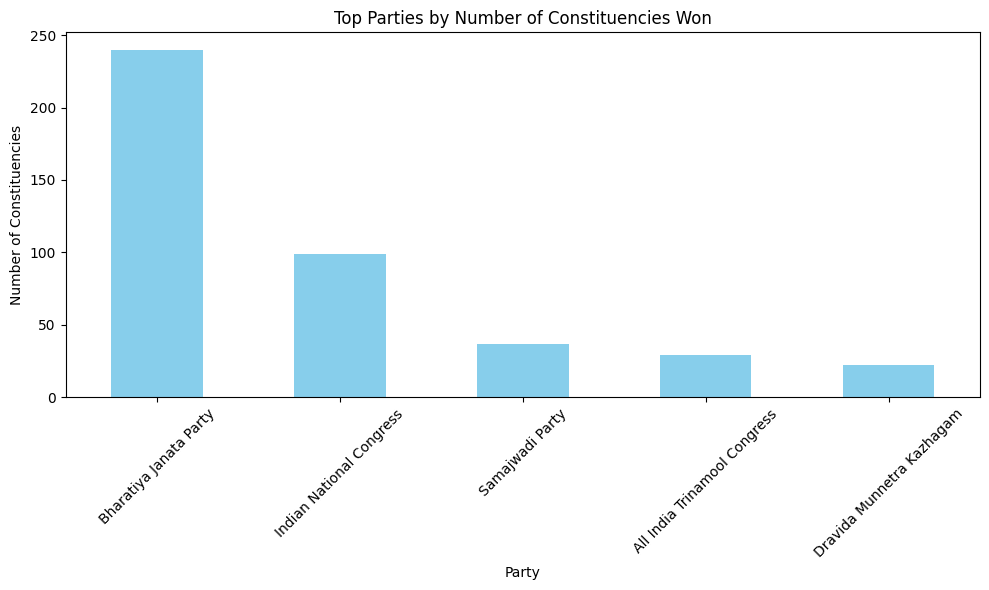

In [22]:


state_party_counts = df_election_results['Leading Party'].value_counts().nlargest(5)
plt.figure(figsize=(10, 6))
state_party_counts.plot(kind='bar', color='skyblue')
plt.title('Top Parties by Number of Constituencies Won')
plt.xlabel('Party')
plt.ylabel('Number of Constituencies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<h1>2. Top Leading Candidates


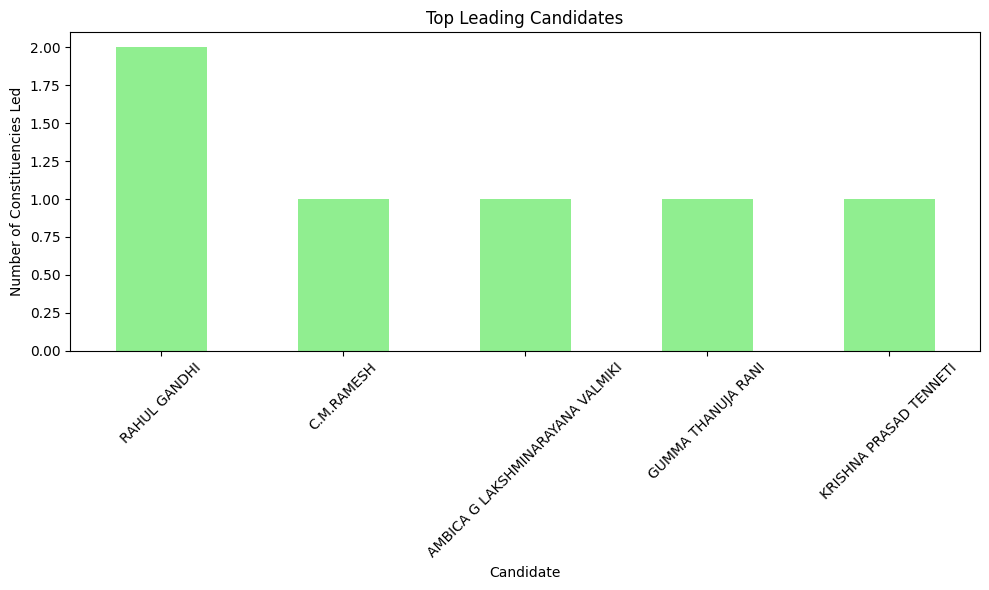

In [24]:
# Example: Top Leading Candidates
top_leading_candidates = df_election_results['Leading Candidate'].value_counts().nlargest(5)
plt.figure(figsize=(10, 6))
top_leading_candidates.plot(kind='bar', color='lightgreen')
plt.title('Top Leading Candidates')
plt.xlabel('Candidate')
plt.ylabel('Number of Constituencies Led')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<h1>3. Margin of Victory Analysis

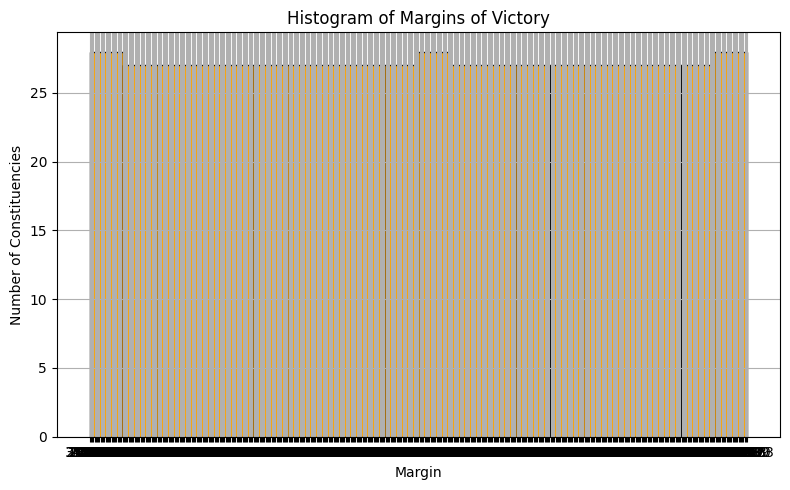

In [25]:
# Example: Margin of Victory Analysis
plt.figure(figsize=(8, 5))
plt.hist(df_election_results['Margin'], bins=20, color='orange', edgecolor='black')
plt.title('Histogram of Margins of Victory')
plt.xlabel('Margin')
plt.ylabel('Number of Constituencies')
plt.grid(True)
plt.tight_layout()
plt.show()


<h1>4. Party with Highest Margins


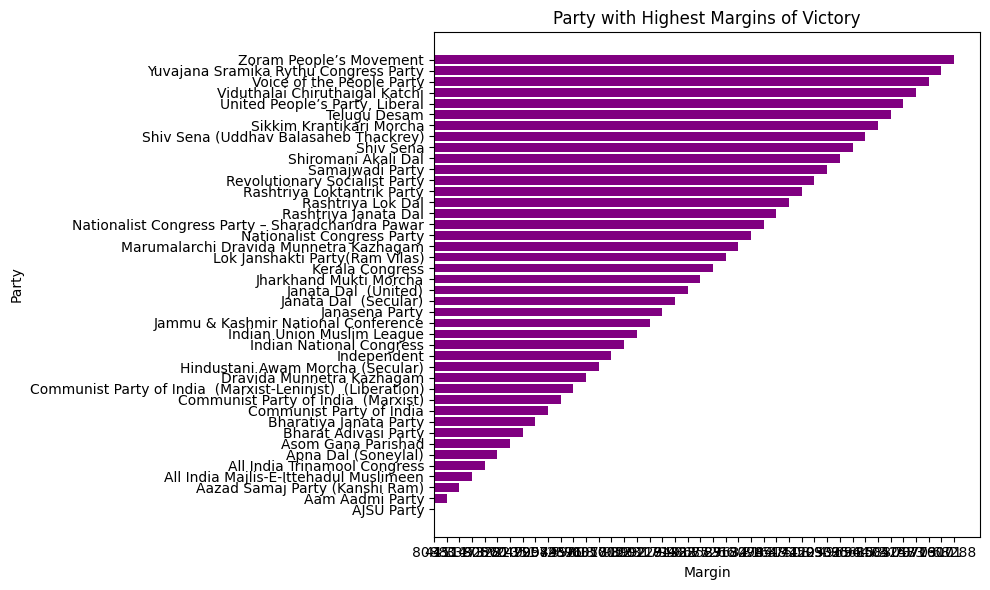

In [26]:
party_highest_margin = df_election_results.loc[df_election_results.groupby('Leading Party')['Margin'].idxmax()]
plt.figure(figsize=(10, 6))
plt.barh(party_highest_margin['Leading Party'], party_highest_margin['Margin'], color='purple')
plt.title('Party with Highest Margins of Victory')
plt.xlabel('Margin')
plt.ylabel('Party')
plt.tight_layout()
plt.show()


<h1>5. Status Distribution

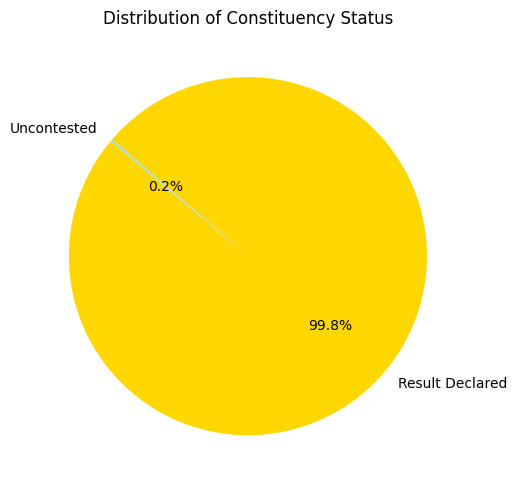

In [27]:
# Example: Status Distribution
status_distribution = df_election_results['Status'].value_counts()
plt.figure(figsize=(8, 5))
status_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['gold', 'lightblue'], startangle=140)
plt.title('Distribution of Constituency Status')
plt.ylabel('')
plt.tight_layout()
plt.show()


<h1>6. Vote Share Analysis (from Bye-Election Constituency-wise)

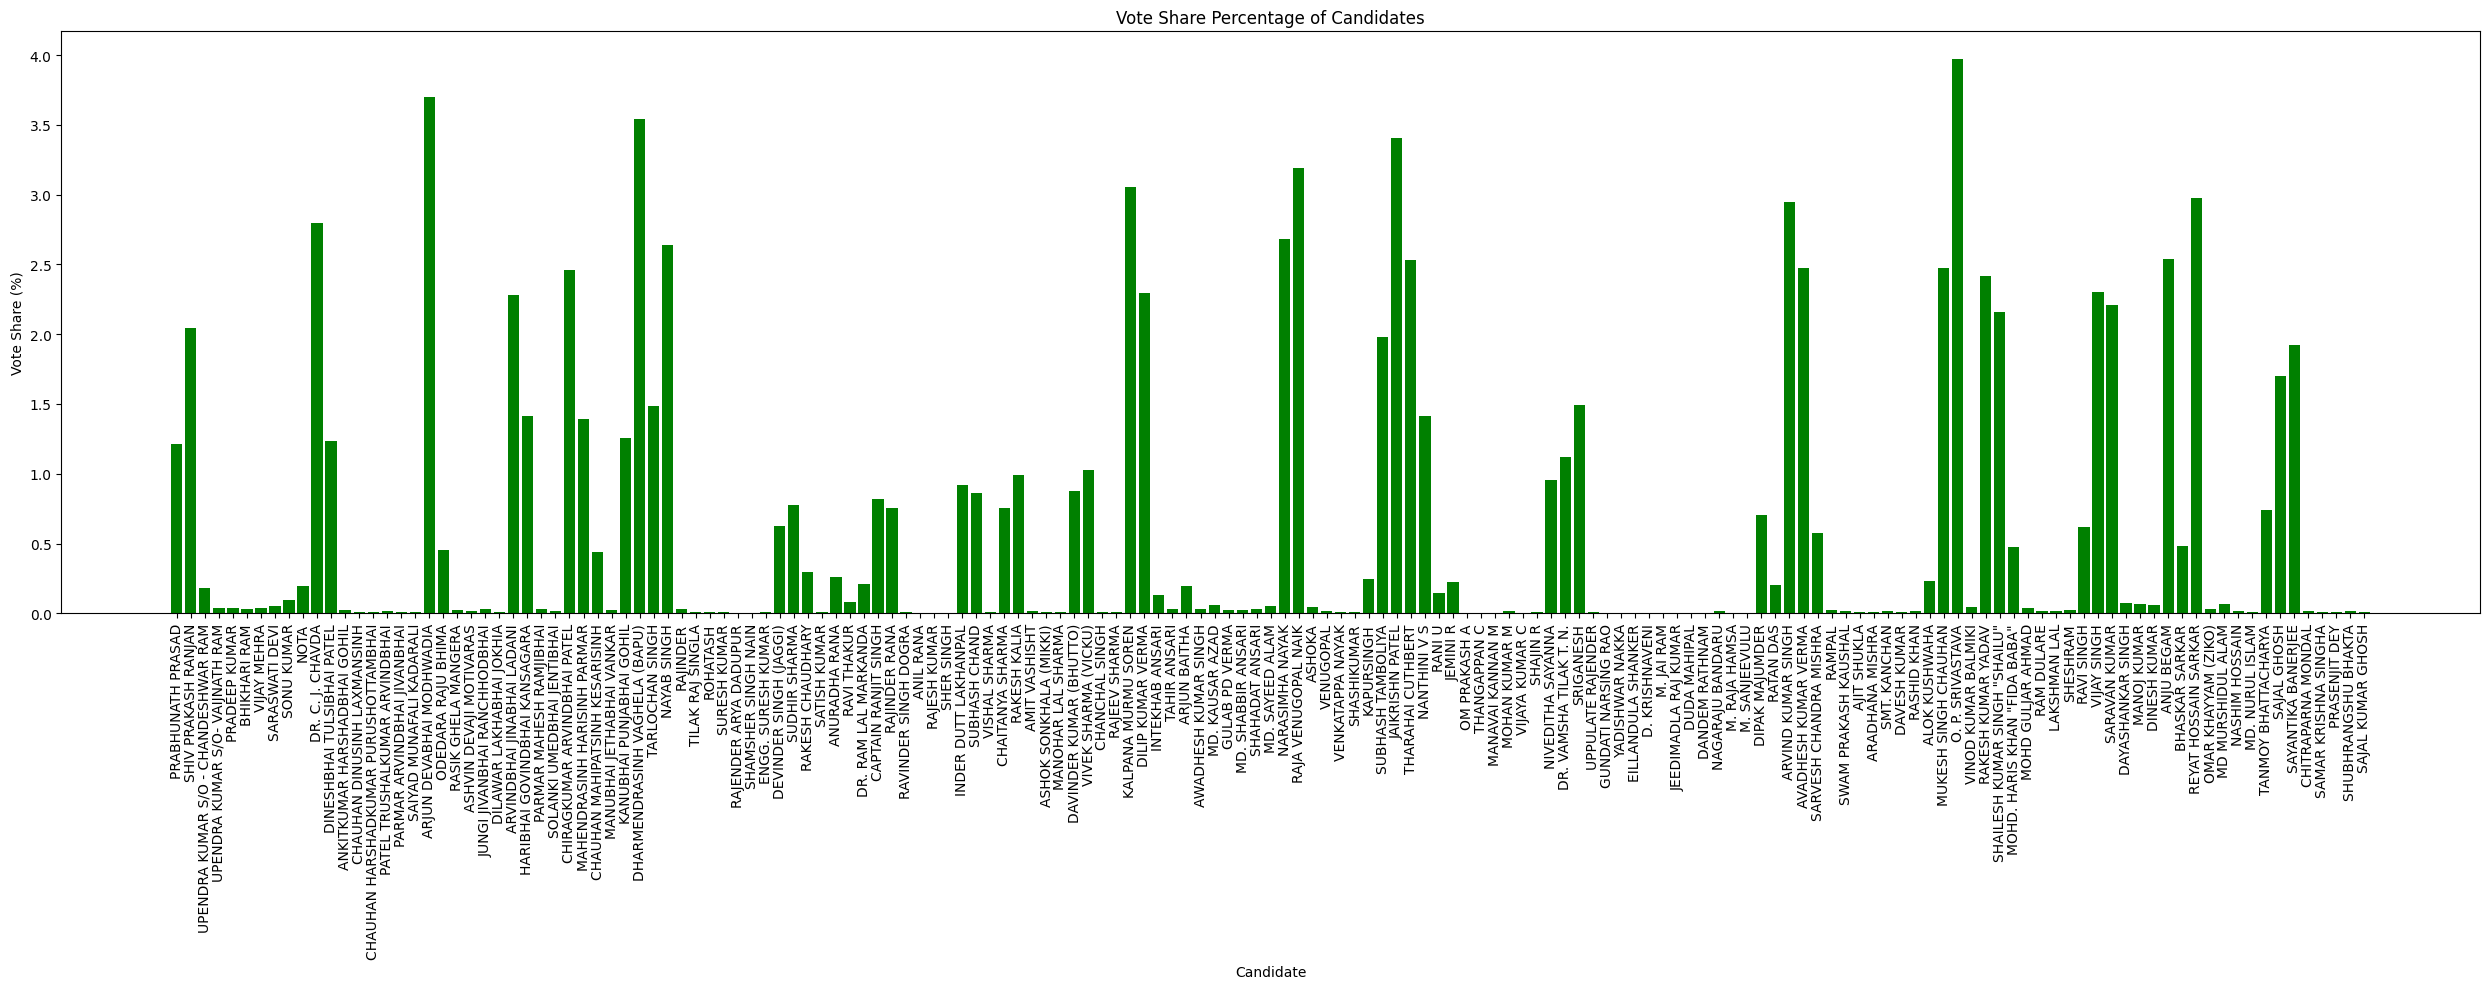

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Example: Vote Share Analysis
# Convert 'Total Votes' column to numeric type
Bye_Election_Constituencywise['Total Votes'] = pd.to_numeric(Bye_Election_Constituencywise['Total Votes'], errors='coerce')

# Calculate Vote Share Percentage
Bye_Election_Constituencywise['Vote Share (%)'] = (Bye_Election_Constituencywise['Total Votes'] / Bye_Election_Constituencywise['Total Votes'].sum()) * 100

# Plotting
plt.figure(figsize=(25, 10))
plt.bar(Bye_Election_Constituencywise['Candidate'], Bye_Election_Constituencywise['Vote Share (%)'], color='green')
plt.title('Vote Share Percentage of Candidates')
plt.xlabel('Candidate')
plt.ylabel('Vote Share (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


<h1>7. Party-wise Results Analysis

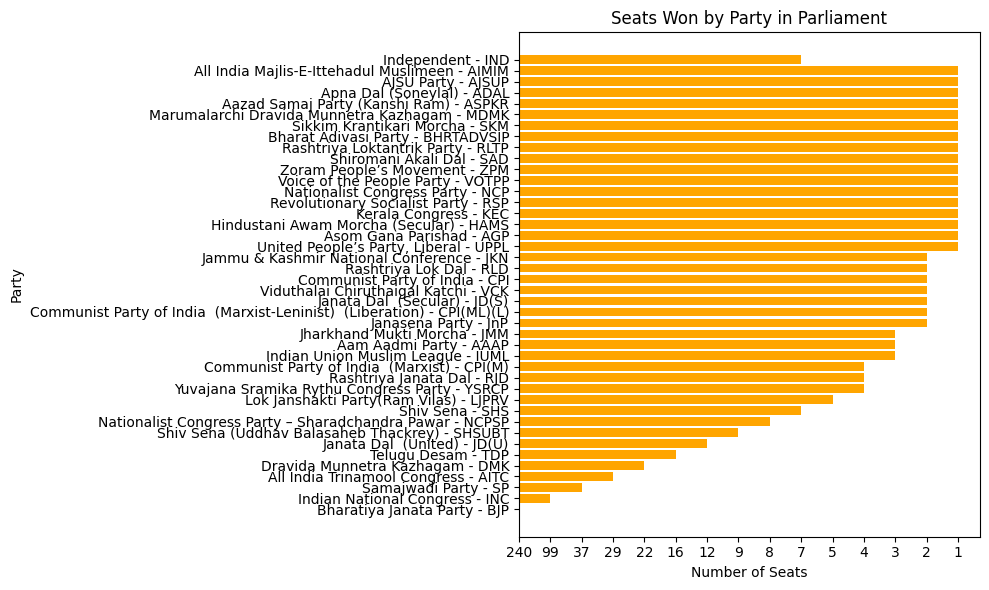

In [45]:
# Plotting party-wise results
plt.figure(figsize=(10, 6))
plt.barh(Parliment_Party_Wise_Results_Status['Party'], Parliment_Party_Wise_Results_Status['Won'], color='orange')
plt.title('Seats Won by Party in Parliament')
plt.xlabel('Number of Seats')
plt.ylabel('Party')
plt.tight_layout()
plt.show()


<h1>8. Leading Party Analysis in General Elections

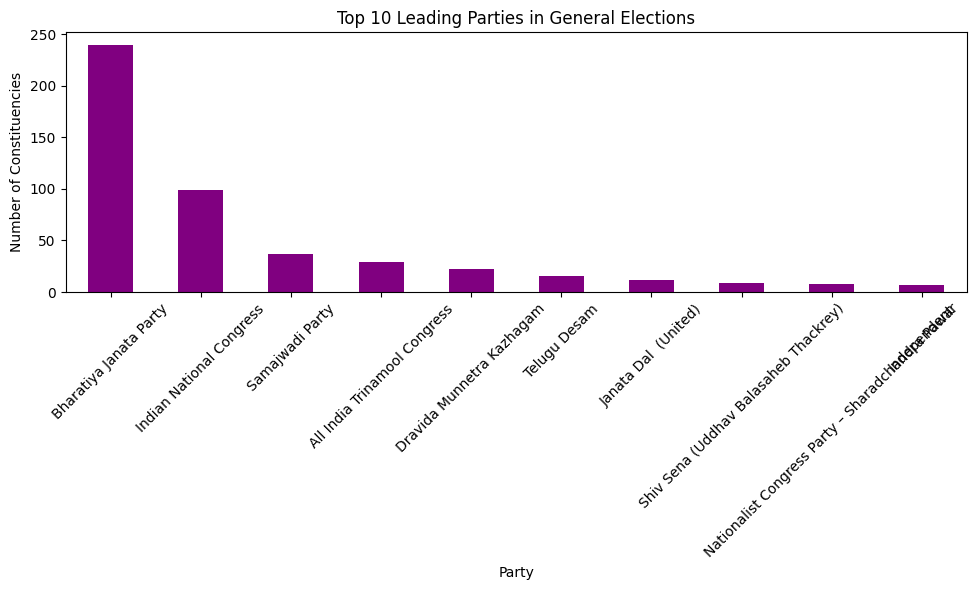

In [47]:
# Counting leading parties
leading_party_counts = df_election_results['Leading Party'].value_counts().head(10)

# Plotting leading parties
plt.figure(figsize=(10, 6))
leading_party_counts.plot(kind='bar', color='purple')
plt.title('Top 10 Leading Parties in General Elections')
plt.xlabel('Party')
plt.ylabel('Number of Constituencies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<h1>9. Comparison of Leading and Trailing Candidates by State

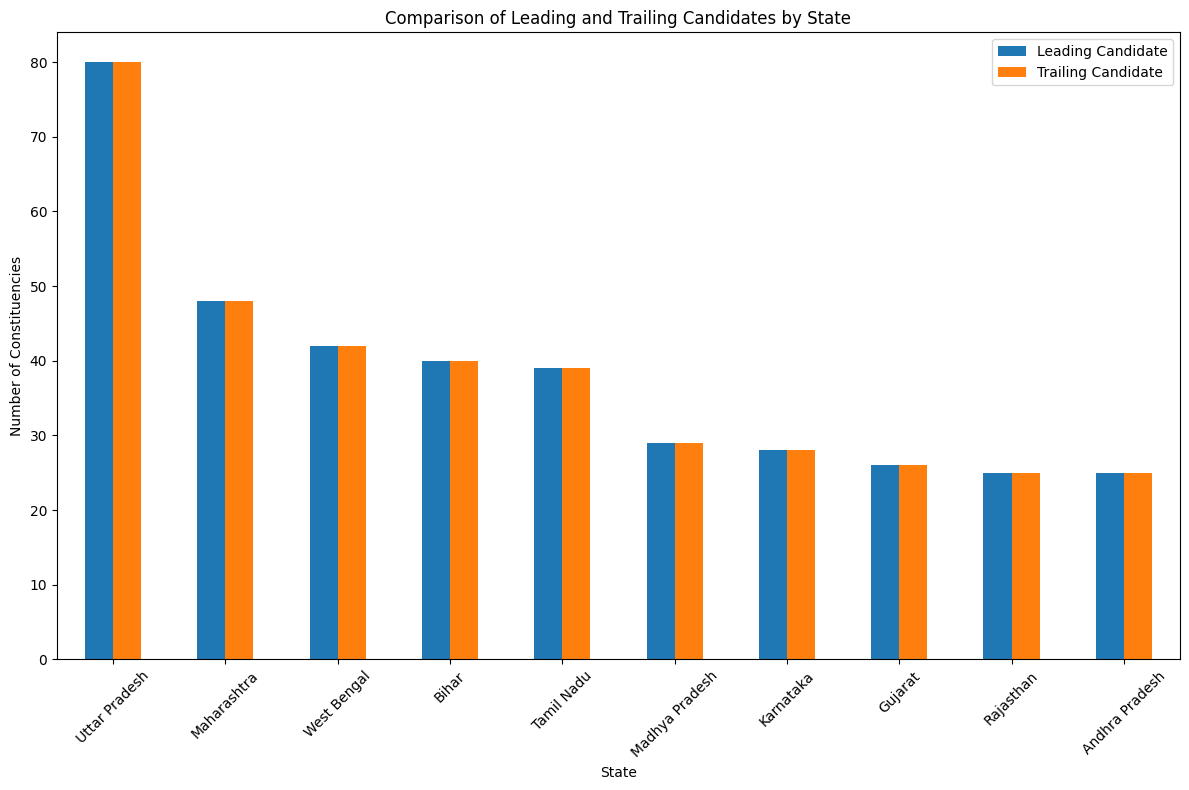

In [48]:
# Grouping by state and counting leading and trailing candidates
state_candidate_counts = df_election_results.groupby('state')[['Leading Candidate', 'Trailing Candidate']].count().sort_values(by='Leading Candidate', ascending=False).head(10)

# Plotting leading and trailing candidates by state
state_candidate_counts.plot(kind='bar', figsize=(12, 8))
plt.title('Comparison of Leading and Trailing Candidates by State')
plt.xlabel('State')
plt.ylabel('Number of Constituencies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [50]:
import seaborn as sns

<h1>10. Analysis of Margin Distribution in General Elections


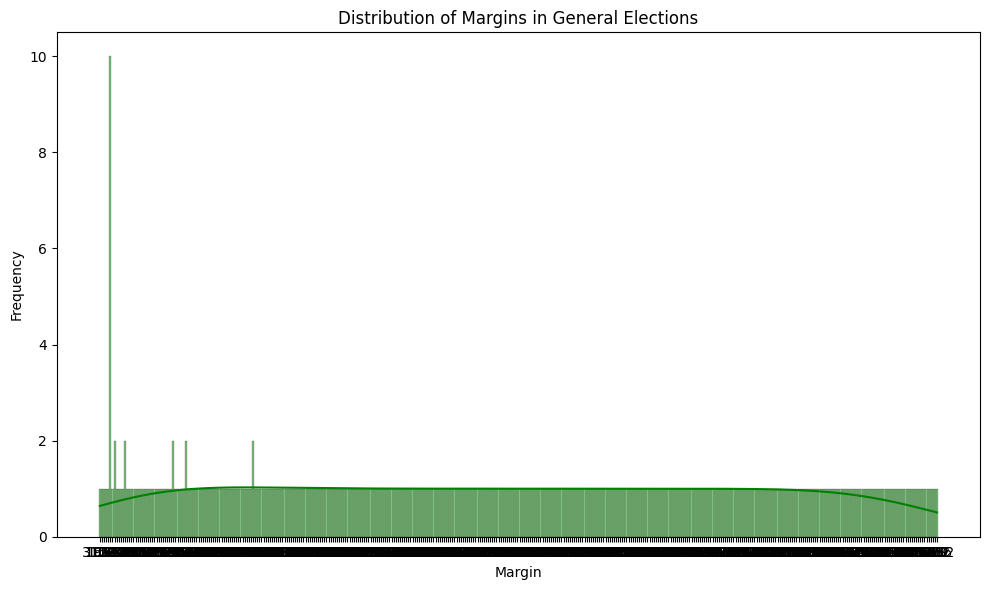

In [51]:
# Distribution plot of margins
plt.figure(figsize=(10, 6))
sns.histplot(General_Election_to_Assembly_Constituencies['Margin'], bins=20, kde=True, color='green')
plt.title('Distribution of Margins in General Elections')
plt.xlabel('Margin')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


<h1>11. Party-wise Vote Share Analysis in Bye Elections


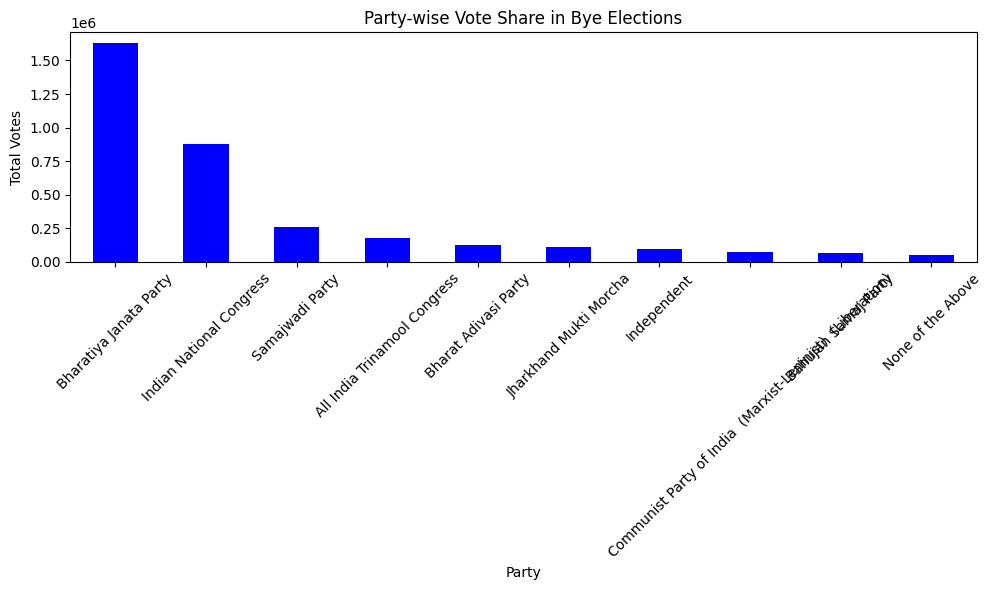

In [52]:
# Calculate total votes per party in Bye Elections
bye_election_party_votes = Bye_Election_Constituencywise.groupby('Party')['Total Votes'].sum().sort_values(ascending=False).head(10)

# Plotting party-wise vote share
plt.figure(figsize=(10, 6))
bye_election_party_votes.plot(kind='bar', color='blue')
plt.title('Party-wise Vote Share in Bye Elections')
plt.xlabel('Party')
plt.ylabel('Total Votes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<h1>12. Leading Candidate Analysis by Party in General Elections

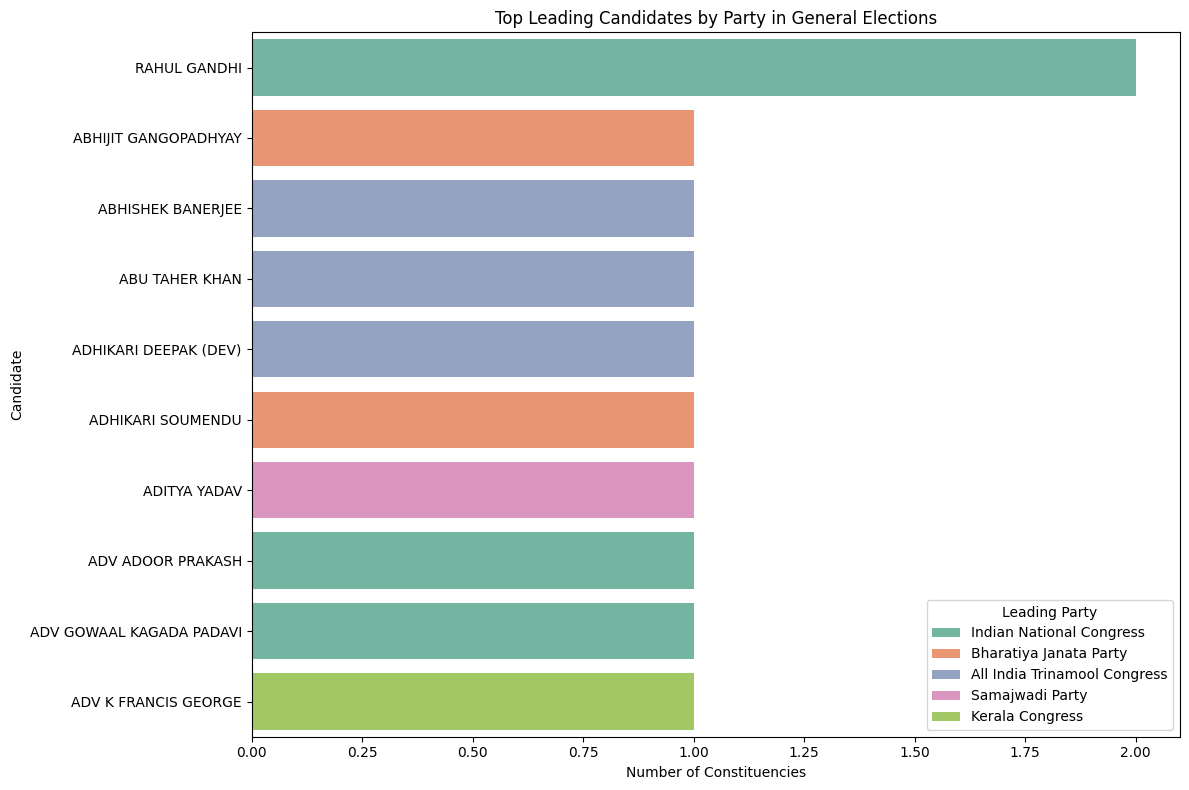

In [54]:
# Grouping by leading candidate and party
leading_candidate_party = df_election_results.groupby(['Leading Candidate', 'Leading Party']).size().reset_index(name='Counts')
leading_candidate_party = leading_candidate_party.sort_values(by='Counts', ascending=False).head(10)

# Plotting leading candidates by party
plt.figure(figsize=(12, 8))
sns.barplot(x='Counts', y='Leading Candidate', hue='Leading Party', data=leading_candidate_party, palette='Set2')
plt.title('Top Leading Candidates by Party in General Elections')
plt.xlabel('Number of Constituencies')
plt.ylabel('Candidate')
plt.tight_layout()
plt.show()


<h1>13. Party-wise Seats Won Analysis


C:\Users\manik\AppData\Local\Temp\ipykernel_6844\1007800998.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Won', y='Party', data=sorted_parties, palette='viridis')


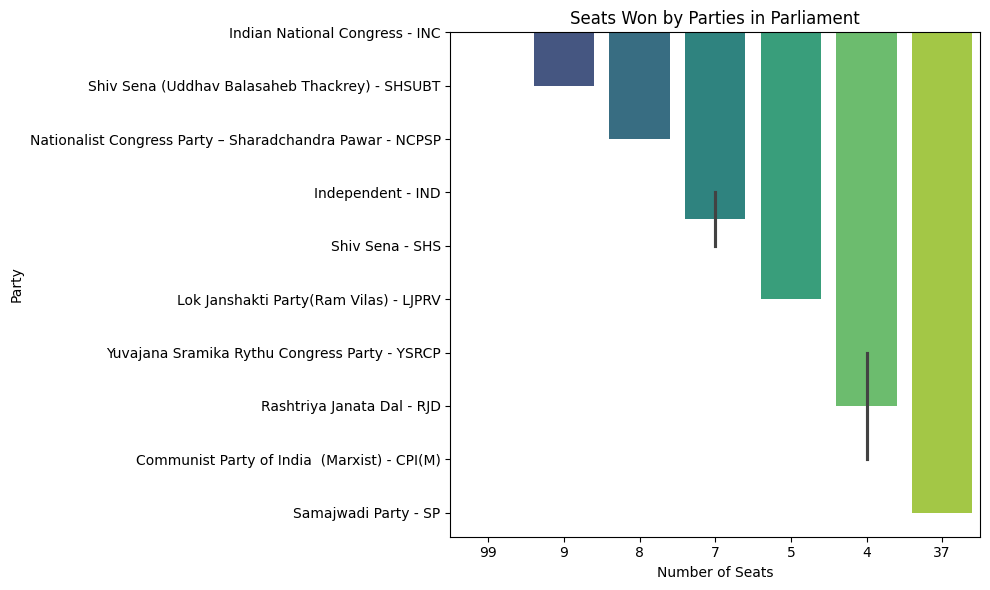

In [57]:
# Sort parties by seats won
sorted_parties = Parliment_Party_Wise_Results_Status.sort_values(by='Won', ascending=False).head(10)

# Plotting party-wise seats won
plt.figure(figsize=(10, 6))
sns.barplot(x='Won', y='Party', data=sorted_parties, palette='viridis')
plt.title('Seats Won by Parties in Parliament')
plt.xlabel('Number of Seats')
plt.ylabel('Party')
plt.tight_layout()
plt.show()
